# 기술통계 (교재 84P)

## [데이터분석]
- 기존데이터에서 패턴을 찾고 미래의 데이터를 예측하거나 분류하는 것
- 분석가능한 데이터란 : 1) 중앙에 밀집되어 있어야 함.
- 머신러닝(정형 데이터분석) - 기존의 통계학적에 기반한 ML, 인공신경망(텐서플로우) 기반의 ML
- 딥러닝(비정형데이터분석)

## Part1 [기술통계]
- 편차
- 분산
- 표준편차

In [2]:
import pandas as pd
import numpy as np

In [3]:
a = [1, 1, 1, 12]
b = [3, 5, 3, 4]

# 평균
suma = 0 ; sumb = 0
for amean, bmean in zip(a,b):
    suma += amean
    sumb += bmean
print(suma/len(a))
print(sumb/len(a))

3.75
3.75


In [4]:
# 중앙값(전체데이터를 오름차순으로 만들고 그 갯수의 가운데 값, 짝수일때는 n/2 n값과 오른쪽 값의 합/2)
a = [1, 1, 1, 12]
b = [3, 3, 4, 5]

def median(var):

    if len(var) % 2 == 0:
        center = int(len(var)/2)
        print((var[center-1]+var[center])/2)
    else:
        center = round(len(a)/2, 0)
        print(var[center])

median(b)

3.5


In [5]:
a = [1, 1, 1, 12]
tmp = pd.DataFrame(a)
print(np.mean(a), np.std(a)) # 모집단을 전체데이터로 나눔
print(tmp.std(ddof=0))      # ddof=0 로 하면 모집단으로 계산함
print(tmp.std(ddof=1))      # ddof=1 로 하면 표본집단으로 계산함

tmp.describe()               # 모집단을 표본집단(n-1개)로 나눔


3.75 4.763139720814412
0    4.76314
dtype: float64
0    5.5
dtype: float64


,0
count,4.00
mean,3.75
std,5.50
min,1.00
25%,1.00
50%,1.00
75%,3.75
max,12.00


In [6]:
print(np.mean(a), np.std(a, ddof=1), np.std(a, ddof=0))

3.75 5.5 4.763139720814412


In [7]:
print(np.mean(b), np.std(b, ddof=1), np.std(b, ddof=0))

3.75 0.9574271077563381 0.82915619758885


In [8]:
# 표준편차 (평균값 - 중앙값)


In [9]:
import numpy as np

print(np.std(a), np.var(a))

print(np.std(b), np.var(b))



4.763139720814412 22.6875
0.82915619758885 0.6875


In [10]:
# 96p 표준편차

import pandas as pd
df = pd.read_csv('data/part3/auto-mpg.csv', header=None)
df.describe()       # 표본집단으로 계산됨

,0,1,2,4,5,6,7
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# 상관계수
## 데이터 분석시 예측과 회귀에 사용되는 결과값(y or 레이블)과 연관성 있는 특징값(x값)을 미리 선별해야 함
## 이때 사용 되는 것이 상관도
## 컴퓨터는 정수보다 소수점으로 작은단위를 계산할때 계산이 더 빠름, 단위는 추후 보기위해 변환작업하면 됨
- 상관도는 숫자값을 Scailing(값의 단위를 줄이는 것)해도 됨

In [11]:
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [12]:
df.corr()

,0,1,2,4,5,6,7
0,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
1,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
2,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
4,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
5,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
6,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
7,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [13]:
df[[7, 5]].corr()

,7,5
7,1.000000,0.205873
5,0.205873,1.000000


In [14]:
df[7_1] = df[7]/100
df[5_1] = df[5]/100

print(df[[7_1, 5_1]].corr())

          71        51
71  1.000000  0.205873
51  0.205873  1.000000


In [15]:
# 상관도 = np.corrcoef(x, y)
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

np.corrcoef(x, y)

array([[1., 1.],
       [1., 1.]])

In [16]:
# 데이터 분석 작업시 데이터 간의 연관성과 패턴을 분석하는 것이기에, 데이터의 범위를 일정한 범위로 줄여서 작업해도 됨 = 스케일링 : 컴퓨터의 연산속도 빠르게 하기 위함
x = [1, 2, 3, 4]
y = [20, 21, 25, 28]

np.corrcoef(x, y)

array([[1.        , 0.97780241],
       [0.97780241, 1.        ]])

In [17]:
import seaborn as sns

# 교재 102P

In [18]:
import pandas as pd
df = pd.read_csv('data/part3/남북한발전전력량.csv', encoding='utf-8')
df.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [19]:
df_ns = df.iloc[[0, 5], 3:]
df_ns.index = ['sou', 'nor']
df_ns = df_ns.astype(int)
df_ns.corr()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1991,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1992,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1993,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1994,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
df_ns

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
sou,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
nor,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


In [21]:
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, sou to nor
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1991    2 non-null      int32
 1   1992    2 non-null      int32
 2   1993    2 non-null      int32
 3   1994    2 non-null      int32
 4   1995    2 non-null      int32
 5   1996    2 non-null      int32
 6   1997    2 non-null      int32
 7   1998    2 non-null      int32
 8   1999    2 non-null      int32
 9   2000    2 non-null      int32
 10  2001    2 non-null      int32
 11  2002    2 non-null      int32
 12  2003    2 non-null      int32
 13  2004    2 non-null      int32
 14  2005    2 non-null      int32
 15  2006    2 non-null      int32
 16  2007    2 non-null      int32
 17  2008    2 non-null      int32
 18  2009    2 non-null      int32
 19  2010    2 non-null      int32
 20  2011    2 non-null      int32
 21  2012    2 non-null      int32
 22  2013    2 non-null      int32
 23  2014    2 non-null  

In [22]:
df_ns.columns=df_ns.columns.map(int)

In [23]:
tdf_ns = df_ns.T
tdf_ns=tdf_ns.astype(int)
tdf_ns

,sou,nor
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231
1995,1847,230
1996,2055,213
1997,2244,193
1998,2153,170
1999,2393,186
2000,2664,194


In [24]:
tdf_ns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1991 to 2016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sou     26 non-null     int32
 1   nor     26 non-null     int32
dtypes: int32(2)
memory usage: 416.0 bytes


In [25]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

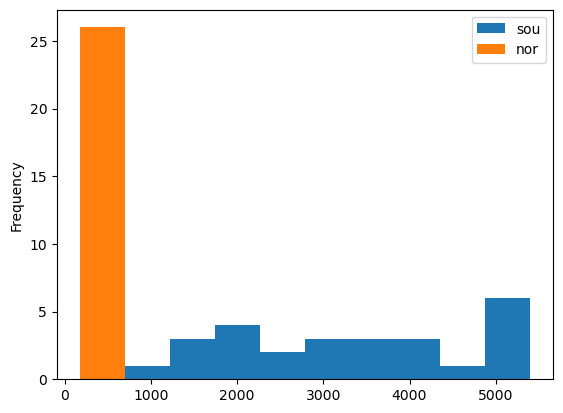

In [26]:
tdf_ns.plot(kind='hist')
plt.show()

# 박스플롯 교재 143P (150~160 까지 자습하기)